<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/19_5_2_SVM_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

 Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

**What we want to see is if we can use the ingredient and keyword list to predict the rating**.

In [0]:
raw_data0 = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [0]:
raw_data=raw_data0.copy()

In [6]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#raw_data.info(680)

In [7]:
raw_data.shape

(20052, 680)

In [0]:
#list(raw_data)

In [0]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

(array([1836.,    0.,  164.,  124.,    0.,  532., 1489., 5169., 8019.,
        2719.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

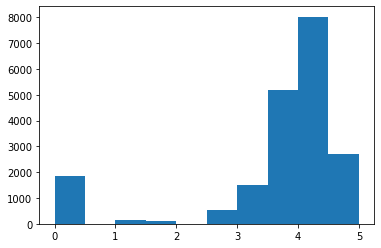

In [0]:
plt.hist(raw_data0['rating'])

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71.

 **What is interesting is that the 25th percentile is actually above the mean**. 
 
 **This means there is likely some kind of outlier population**.
 
  This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

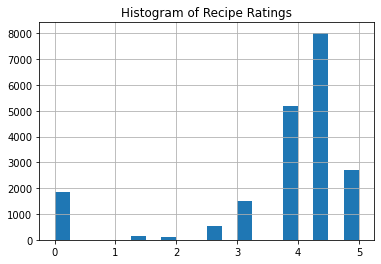

In [0]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram.

 **Firstly there are sharp discontinutities**.
 
 **We don't have continuous data**. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

**Let's try a naive approach again, this time using SVM Regressor**.

 But first, we'll have to do a bit of data cleaning.

In [0]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

**What we can see right away is that nutrition information is not available for all goods**.

 Now this would be an interesting data point, but let's focus on ingredients and keywords right now. 

**So we'll actually drop the whole columns for calories, protein, fat, and sodium.** We'll come back to nutrition information later.

In [0]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Let's see what a scatter plot looks like, comparing actuals to predicted**.

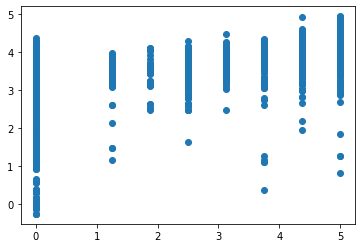

In [0]:
plt.scatter(Y, svr.predict(X))

**Now that is a pretty useless visualization**.

**This is because of the discontinuous nature of our outcome variable**.

 There's too much data for us to really see what's going on here. 


 **If you wanted to look at it you could create histograms**,
 
  **here we'll move on to the scores of both our full fit model and with cross validation.** Again if you choose to run it again it will take some time, so you probably shouldn't

In [0]:
svr.score(X, Y)

0.4099845913800794

In [0]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.19563385, 0.14683481, 0.15013401, 0.13597791, 0.16082192])

Oh dear, so this did seem not to work very well. 

**In fact it is remarkably poor**. Now there are many things that we could do here.

Firstly the overfit is a problem, even though it was poor in the first place.

 We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

**Lastly, we could take our regression problem and turn it into a classifier**.

 With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem.
 
  **We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values**.

**And that is your challenge**.

**Transform this regression problem into a binary classifier and clean up the feature set**.

 You can choose whether or not to include nutritional information, but **try to cut your feature set down to the 30 most valuable features**.

Good luck!


When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate might just be happier people.

**//////////////////////////////////////////////////////////////////////////////////**

**FIRST WILL DROP TITLE AND RATING**

**NEXT WILL REPLACE THE NULLS IN PROTEIN, FAT, SODIUM, CALORIES WITH COLUMN MEANS**

In [0]:
raw_data.drop(['rating', 'title'], 1,inplace=True)

sub2['income'].fillna((sub2['income'].mean()), inplace=True)

In [0]:
raw_data['calories'].fillna((raw_data['calories'].mean()))

0         426.000000
1         403.000000
2         165.000000
3        6322.958017
4         547.000000
            ...     
20047      28.000000
20048     671.000000
20049     563.000000
20050     631.000000
20051     560.000000
Name: calories, Length: 20052, dtype: float64

In [0]:
#[  raw_data[col].fillna((raw_data[col].mean()),inplace=True) for col in list(raw_data)]

In [0]:
raw_data.isnull().sum()

calories      0
protein       0
fat           0
sodium        0
#cakeweek     0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 678, dtype: int64

In [0]:
#list(raw_data)

In [0]:
y=raw_data0['rating']

**USING RANDOM FOREST REGRESSOR TO FIND TOP 30**



In [0]:
clf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1,max_depth=3)

In [0]:
# Train the classifier
clf.fit(raw_data, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
preds=clf.predict(raw_data)

In [0]:
#clf.feature_importances_

In [0]:
v=sorted(list(zip(clf.feature_importances_,raw_data)),reverse=True)[:30]

Edit: Note that **zip(*iterable) is its own inverse**

In [0]:
list1, list2 = zip(*source_list)

In [0]:
list1, list2 = zip(*v)

In [0]:
l22=list(list2)
#l22

In [0]:
clf.fit(raw_data[l22],y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

**STILL IN CONTINUOUS MODE -- RESLULTS WITH TOP 30 EVEN WORSE**

In [0]:
clf.predict(raw_data[l22])

array([3.76965752, 3.8576464 , 3.66830014, ..., 3.82968007, 3.8576464 ,
       3.8576464 ])

In [0]:
clf.score(raw_data[l22],y)

0.11648945619737694

/////////////////////////////////////////

  **CREATING BINARY TARGET**

In [8]:
raw_data.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
raw_data['binary_rating']=np.where(raw_data['rating']<4.375,0,1)

In [0]:
y=raw_data['binary_rating'].sample(frac=0.3)

x=raw_data.drop(['rating','binary_rating','title','calories','fat','sodium','protein'],1)

In [0]:
clf.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
clf.predict(x)

array([0.49201434, 0.57989652, 0.49201434, ..., 0.55705081, 0.55698948,
       0.59156813])

**TERRIBLE RESULT**

In [0]:
clf.score(x,y)

0.03073904360677371

**TRY AGAIN**

In [0]:
raw_data.drop('title',axis=1,inplace=True)

In [0]:
#[raw_data[col].fillna((raw_data[col].mean()),inplace=True) for col in list(raw_data)]

In [0]:
x=raw_data.drop(['rating','binary_rating'],1).sample(frac=0.3)

In [0]:
clf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1,max_depth=3)

In [23]:
clf.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [24]:
clf.predict(x)

array([0.53758997, 0.51394726, 0.53747453, ..., 0.53348562, 0.5262795 ,
       0.53486237])

In [25]:
clf.score(x,y)

0.013476276171496271

**WHAT IS WRONG**


**TRY RANDOM FOREST AGAIN TO PICK TOP 30**

**THIS TIME USE RANDOM FOREST CLASSIFIER**



In [0]:
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1,max_depth=3)

In [0]:
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
preds=clf.predict(x)

In [26]:
clf.score(x,y)

0.013476276171496271

In [0]:
v=sorted(list(zip(clf.feature_importances_,x)),reverse=True)[:30]

In [28]:
v

[(0.08203192643265711, 'calories'),
 (0.050995396000828336, 'sodium'),
 (0.0467691302243075, 'fat'),
 (0.04148263028108568, 'coconut'),
 (0.03104502560242898, 'fruit'),
 (0.02830321477006683, 'protein'),
 (0.02569188023139896, 'clove'),
 (0.024968633729926748, 'roast'),
 (0.015897697312171503, 'red wine'),
 (0.014579115842001888, 'zucchini'),
 (0.014573707790540756, 'apple'),
 (0.014212231557467682, 'salad'),
 (0.01419125813677874, 'basil'),
 (0.012479204461104523, 'jalapeño'),
 (0.011751259493957784, 'ice cream machine'),
 (0.01153341255938031, 'pepper'),
 (0.010416090008794551, 'dairy'),
 (0.010377898862732443, 'mayonnaise'),
 (0.010358474694411462, 'thanksgiving'),
 (0.010221244462309029, 'christmas'),
 (0.010157183265130605, 'no sugar added'),
 (0.008597587067848682, 'gourmet'),
 (0.008407508212487824, 'brunch'),
 (0.008250996116065225, 'cumin'),
 (0.008165340467611077, 'herb'),
 (0.007849111471469265, 'lunch'),
 (0.0071149234177979945, 'summer'),
 (0.006784062266756094, 'macadamia

In [0]:
list1, list2 = zip(*v)

In [0]:
list22=list(list2)
x22=x[list22]

In [0]:
from sklearn.svm import LinearSVC
svr=LinearSVC()

In [35]:
svr.fit(x22,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [37]:
svr.predict(x22)

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
svr.score(x22,y)

0.4669215425531915

MUCH BETTER RESULT

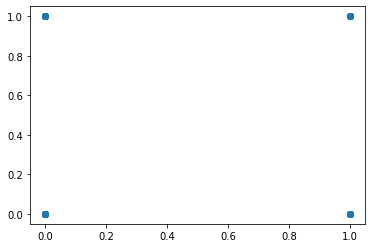

In [38]:
plt.scatter(y, svr.predict(x22))